<a href="https://colab.research.google.com/github/isaacmikhail/TelecomX_challenge_Alura/blob/main/TelecomX_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [103]:
DataFrame=pd.read_json(url)
DataFrame

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [120]:
# Normaliza cada coluna aninhada
account_df = pd.json_normalize(DataFrame['account'])
internet_df = pd.json_normalize(DataFrame['internet'])
phone_df = pd.json_normalize(DataFrame['phone'])
customer_df = pd.json_normalize(DataFrame['customer'])

# Junta tudo com as colunas simples
base_df = pd.concat([DataFrame[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


In [121]:
base_df['PerfilCliente'] = base_df.apply(
    lambda row: (
        'Internet e Telefone' if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No'
        else 'Só Internet' if row['PhoneService'] == 'No' and row['InternetService'] != 'No'
        else 'Só Telefone' if row['PhoneService'] == 'Yes' and row['InternetService'] == 'No'
        else 'Sem serviço'
    ),
    axis=1
)

In [125]:
base_df['PerfilCliente'].value_counts()

,count
PerfilCliente,
Internet e Telefone,4979
Só Telefone,1581
Só Internet,707


In [126]:
# Apenas clientes com ambos os serviços
clientes_completos = base_df[base_df['PerfilCliente'] == 'Internet e Telefone']

# Apenas clientes com internet
clientes_internet = base_df[base_df['PerfilCliente'] == 'Só Internet']

In [127]:
for col in base_df.select_dtypes(include='object').columns:
    base_df[col] = base_df[col].str.strip()

In [129]:
for col in base_df.select_dtypes(include='object').columns:
    base_df[col] = base_df[col].str.lower()

In [108]:
customer_df.isnull().sum()
internet_df.isnull().sum()
phone_df.isnull().sum()
account_df.isnull().sum()


,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0


In [118]:
phone_df = phone_df[phone_df['PhoneService'] == 'Yes']


In [111]:
internet_df = internet_df[internet_df['InternetService'] != 'No']


In [112]:
phone_df = phone_df[phone_df['MultipleLines'] != 'No phone service']


In [130]:
base_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.3,internet e telefone
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.4,internet e telefone
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,internet e telefone
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,internet e telefone
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.4,internet e telefone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.9,internet e telefone
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.7,internet e telefone
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,internet e telefone
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,internet e telefone


In [78]:
base_df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [123]:
base_df.duplicated().sum()


np.int64(0)

In [80]:
base_df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [101]:
base_df


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,True,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,True,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,True,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,True,False,False,13,True,No,DSL,...,No,No,Yes,No,No,One year,False,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,True,True,False,22,True,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,True,False,False,2,True,No,DSL,...,Yes,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,True,True,True,67,True,No,DSL,...,No,Yes,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65


In [100]:
bool_cols=['SeniorCitizen']
for col in bool_cols:
  base_df[col]=base_df[col].map({1:True, 0:False})

base_df[col] = base_df[col].astype(bool)
base_df[col] = base_df[col].astype(bool)

In [96]:
cols_bin = [col for col in base_df.columns
                 if base_df[col].dropna().isin(['Yes', 'No']).all()]

# Converte para booleano
for col in cols_bin:
    base_df[col] = base_df[col].map({'Yes': True, 'No': False})



In [98]:
base_df[col] = base_df[col].astype(bool)

In [94]:
base_df['Charges.Total'] = pd.to_numeric(base_df['Charges.Total'], errors='coerce')

In [99]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [64]:
base_df[(base_df['PhoneService'] == False) & (base_df['MultipleLines'] != 'No')]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [65]:
base_df['customerID'].duplicated().sum()

np.int64(0)

<Axes: xlabel='Charges.Total', ylabel='Count'>

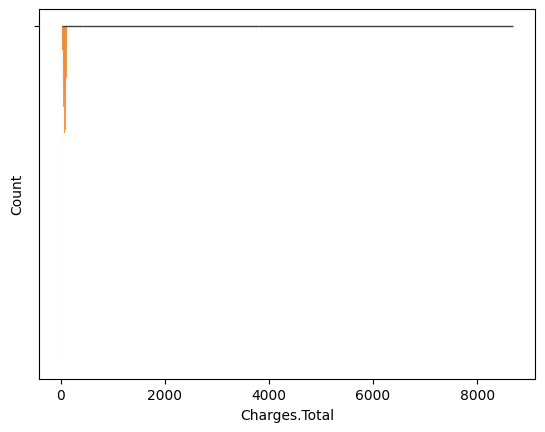

In [68]:
sns.boxplot(x=base_df['Charges.Total'])  # Outliers
sns.histplot(base_df['Charges.Monthly'], bins=30)  # Distribuição

In [69]:
base_df['SeniorCitizen'].value_counts(normalize=True)

,proportion
SeniorCitizen,
0,0.837347
1,0.162653
